As a first step, the names of all characters of the show [South Park](https://en.wikipedia.org/wiki/South_Park) are gathered. They are saved in a pandas DataFrame, with the name in the first column `['name']` and each character's wikilink in the second column `['wikilink']`. The associated text is also stored in subsequent columns. The DataFrame is pickled finally pickled. To this end, the Wikipedia article [List of South Park characters](https://en.wikipedia.org/wiki/List_of_South_Park_characters) is used.

In [33]:
# Imports
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import json
import pickle
import requests
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [List of South Park characters](https://en.wikipedia.org/wiki/List_of_South_Park_characters), the following sections list the characters and their links, alongside some character synopsis for some of the characters:  
- Main characters  
- Secondary characters  
- Recurring characters  
  - Significant characters (in table format)  
  - Other characters (in table format)  
- Former characters (characters that are either killed or retired, in table format)  

Since there are many links inside also the descriptions, beautiful soup will be used to get the aforementioned parts.

In [2]:
# Wikipedia url that contains all the characters
wiki_url = 'https://en.wikipedia.org/wiki/List_of_South_Park_characters'

# Get raw html page
raw_html = requests.get(wiki_url)

# Use bs4 to prettify and make easier to find sections
soup = BeautifulSoup(raw_html.text, 'html.parser')

In [3]:
for article in soup.find_all('div', class_='mw-parser-output'):
    headline = article.find_all('h3')
    for head in headline:
        print(head)
    


<h3><span class="mw-headline" id="Cast">Cast</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_South_Park_characters&amp;action=edit&amp;section=2" title="Edit section: Cast">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<h3><span class="mw-headline" id="Stan_Marsh">Stan Marsh</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_South_Park_characters&amp;action=edit&amp;section=4" title="Edit section: Stan Marsh">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<h3><span class="mw-headline" id="Kyle_Broflovski">Kyle Broflovski</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_South_Park_characters&amp;action=edit&amp;section=5" title="Edit section: Kyle Broflovski">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<h3><span class="mw-headline

In [4]:
for article in soup.find_all('div', class_='hatnote'):
    print(article.prettify())

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Stan_Marsh" title="Stan Marsh">
  Stan Marsh
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Kyle_Broflovski" title="Kyle Broflovski">
  Kyle Broflovski
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Eric_Cartman" title="Eric Cartman">
  Eric Cartman
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Kenny_McCormick" title="Kenny McCormick">
  Kenny McCormick
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Butters_Stotch" title="Butters Stotch">
  Butters Stotch
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Randy_and_Sharon_Marsh" title="Randy and Sharon Marsh">
  Randy and Sharon Marsh
 </a>
</div>

<div class="hatn

Use [fandom](https://southpark.fandom.com/wiki/Category:Characters)

In [5]:
chars_url = 'https://southpark.fandom.com/wiki/Portal:Characters'
raw_html = requests.get(chars_url)

soup = BeautifulSoup(raw_html.text, 'html.parser')

In [6]:
# Create the base url that is combined with
# each characters; unique url
base_url = 'https://southpark.fandom.com'

In [7]:
# Initiate a dictionary for each character and its link
chars_dict = {}

In [8]:
for char_letter in soup.find_all('div', class_='wikia-gallery'):
    characters = char_letter.find_all('div', class_='lightbox-caption')
    for character in characters:
        char_name = character.text
        if char_name not in list(chars_dict.keys()): # Avoid duplicates due to trending characters on top of page
            chars_dict[char_name] = base_url+character.a['href']

Now that I have all the characters links, I create a `pandas` DataFrame from it.

In [9]:
characters_df = pd.DataFrame.from_dict( {'name':chars_dict.keys(), 'link':chars_dict.values()} )

# Set the index to be the name column for ease of use later
characters_df_nameidx =  characters_df.set_index('name')

In [10]:
characters_df.head(5)

,name,link
0,Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman
1,Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick
2,Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski
3,Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh
4,A 34-Year-Old Asian Man Who Looks Strikingly S...,https://southpark.fandom.com/wiki/A_34-Year-Ol...


In [11]:
print(f"There are {characters_df.shape[0]} characters")

There are 2056 characters


In [12]:
characters_df_nameidx.head(5)

,link
name,
Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman
Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick
Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski
Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh
A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán,https://southpark.fandom.com/wiki/A_34-Year-Ol...


Also create a column that stores the first name of the characters. The major ones are called by their first names. I do not care if I miss some secondary ones.

In [13]:
characters_df_nameidx[:]

,link
name,
Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman
Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick
Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski
Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh
A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán,https://southpark.fandom.com/wiki/A_34-Year-Ol...
...,...
6th Grader with Yellow Shirt and Brown Pants,https://southpark.fandom.com/wiki/6th_Grader_w...
911 Operator,https://southpark.fandom.com/wiki/911_Operator
911 Truth Webmaster,https://southpark.fandom.com/wiki/911_Truth_We...


In [14]:
# characters_df_nameidx['name'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(" "))<3 else x)

In [15]:
characters_df_nameidx['first_name'] = characters_df['name'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(" "))<3 else x)

In [16]:
characters_df_nameidx.head()

,link,first_name
name,,
Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman,NaN
Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick,NaN
Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski,NaN
Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh,NaN
A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán,https://southpark.fandom.com/wiki/A_34-Year-Ol...,NaN


Now that we have a pandas dataframe, we can add columns with the text of each character. The text is added by getting it from the corresponding character's link.

In [17]:
def get_char_text_fandom(soup_obj):
    char_txt = ''
    for part in soup_obj.find_all('div', class_='mw-parser-output'):
        paras = part.find_all('p')
        for para in paras[2:]:
            char_txt+=para.text
    
#     lsts = part.find_all('ul')
#     for lst in lsts:
#         print(lst.text)
#         print('-'*60)  
        
        return char_txt

In [18]:
def get_list_of_link_titles(soup_obj):
    link_list = []
    for part in soup_obj.find_all('div', class_='mw-parser-output'):
        ps = part.find_all('p')
        for p in ps:
            links = p.find_all('a')
            for link in links:
                try:
                    link_list.append(link['title'])
                except KeyError as e:
                    pass           
    return link_list

In [19]:
try:
    with open('characters_df.pickle', 'rb') as f:
        characters_df_nameidx = pickle.load(f)

except FileNotFoundError as e:
    print(e)
    print('Generating character dataframe...')    

    for character in tqdm(characters_df_nameidx.index.to_list()):
        # Get characters url page
        char_url = characters_df_nameidx.loc[character, 'link']

        # Get the cleaned version of its text
        char_text = requests.get(char_url)
        soup = BeautifulSoup(char_text.text, 'html.parser')
        txt = get_char_text_fandom(soup)

        # Store it in the dataframe under a new column, with fandom included in its name
        characters_df_nameidx.loc[character, 'fandom_text'] = txt

        # Get the link list of each character
        link_lst = get_list_of_link_titles(soup)

        # Store it in the dataframe under a new column
        characters_df_nameidx.at[character, 'links_list'] = link_lst


    SAVE = True

    if SAVE:
        with open('characters_df.pickle', 'wb') as f:
            pickle.dump(characters_df_nameidx, f)

Now that I have some initial text data for each character, I can start forming a network. But the difficulty lies in the fact that in the text, only the first names or their variations are shown. There is also the case of words such as `boys`, which refer to the characters `Kyle`, `Stan`, `Eric` and `Kenny`, if the latter is still alive. This case is difficult to discover. Moreover, there is a case where a girl is called `Red`, as well as an adult. From fandom, the links can also be searched for interactions, since the first time a character is mentioned, it is linked.

In [20]:
import networkx as nx

In [21]:
G = nx.DiGraph()

In [22]:
G.add_nodes_from(chars_dict.keys())

Now that the network has been created, each text can be parsed and add the edges, in a directed manner. To this end, the following function is defined:

In [23]:
for character in tqdm(characters_df_nameidx.index.to_list()):
    for link in characters_df_nameidx.loc[character, 'links_list']:
        if link in characters_df_nameidx.index.to_list():
            if link != character:
                G.add_edge(character, link)

  0%|          | 0/2056 [00:00<?, ?it/s]

In [24]:
import numpy as np

In [25]:
out_degrees = np.array([deg for (node, deg) in G.out_degree])
in_degrees = np.array([deg for (node, deg) in G.in_degree])

Identify the weakly connected characters, that might not be formally part of stories.

In [26]:
G_weak = nx.weakly_connected_components(G)

In [27]:
# See who are in the weakly connected components
i=0
for el in G_weak:
    if i==0:
        print(len(el))
    else:
        print(len(el), ' : ', list(el))        
    i+=1

1933
1  :  ['Afro Ninja']
1  :  ['Alex Glick']
1  :  ['Anchorman']
1  :  ['Arturo Gatti']
1  :  ['Babylonians']
2  :  ['Ryan ("Faith Hilling")', 'Barkley']
3  :  ['Barry Bonds', 'Jason Giambi', 'Mark McGwire']
1  :  ['Beach Family ("Insecurity")']
1  :  ['Benny Hill']
1  :  ["Blockbuster Employee's Ghost"]
1  :  ['Blonde-Haired Girl ("Erection Day")']
1  :  ['Bob Saget']
1  :  ['Bob Thomas']
1  :  ['Boy in Finn Costume']
1  :  ['Boy with Brown Hair and Red Shirt']
1  :  ['Boy with Dark Green Shirt and Glasses']
1  :  ['Boy with Earmuffs']
2  :  ['Brad Morgan', 'Christina Nylon']
1  :  ['Brian Thompson-Jarvis']
1  :  ['Bubb Rubb']
1  :  ['Cajun Shrimp Merchant']
1  :  ['Canadian Banker']
1  :  ['Canadian Barking Spider']
1  :  ['Cee Lo Green']
3  :  ['Chief Runs With Premise', 'Premise Running Thin', "Chief Runs With Premise's Wife"]
1  :  ['Chiquita']
2  :  ['Clark', 'Laura']
1  :  ['Colette Francis']
1  :  ['Crippled Girl with Brown Hair']
1  :  ['Dave Beckett']
1  :  ['David Satcher'

The characters in the small clusters (or alone) are characters that are not connected to the main cahracters. Some are refereed, as presenters, mailman, etc. So we can remove them.

In [28]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_weakly_con = G.subgraph(list(largest_cc))

In [29]:
print(f"Number of nodes in maximum length weakly connected subgraph: {len(list(G_weakly_con.nodes))}")
print(f"Number of edges in maximum length weakly connected subgraph: {len(list(G_weakly_con.edges))}")

Number of nodes in max weakly connected subgraph: 1933
Number of edges in max weakly connected subgraph: 12966


We can plot the in and oout degree distributions for the Graph of the max-len weakly connected component

In [44]:
# Find the degrees distribution
# Numpy version of degrees only since it is more convenient to use
in_degrees = np.array([deg for (node, deg) in G_weakly_con.in_degree])
out_degrees = np.array([deg for (node, deg) in G_weakly_con.out_degree])

# Dictionary to also find characters:
in_degrees_dict = {node:deg for (node, deg) in G_weakly_con.in_degree}
out_degrees_dict = {node:deg for (node, deg) in G_weakly_con.out_degree}

# Visualize degrees distribution, using histograms
v_in = np.arange(in_degrees.min(), in_degrees.max()+1, 1)
hist_in, edges_in = np.histogram(in_degrees, bins=v_in)

v_out = np.arange(out_degrees.min(), out_degrees.max()+1, 1)
hist_out, edges_out = np.histogram(out_degrees, bins=v_out)

Text(0, 0.5, 'Count')

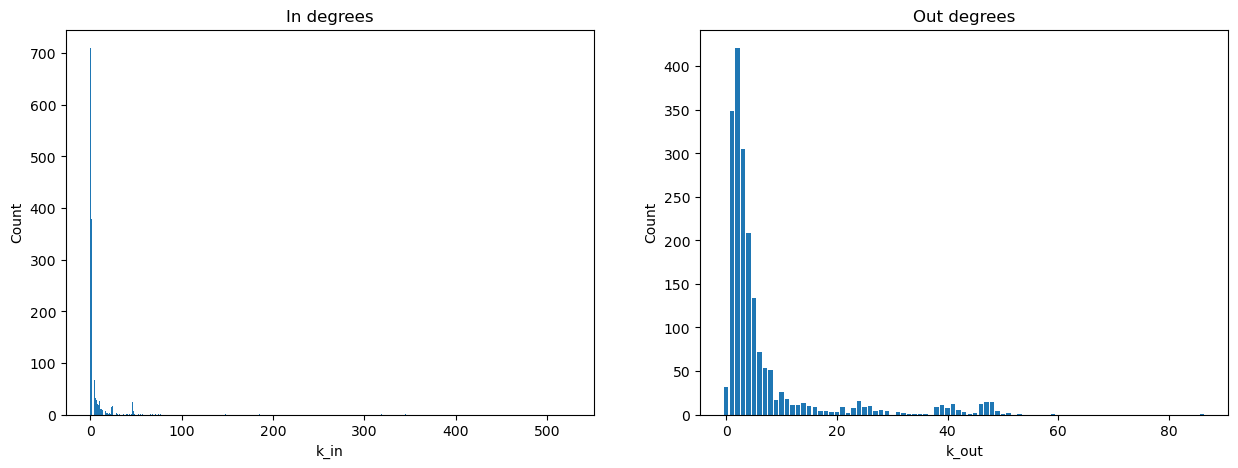

In [38]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(edges_in[:-1], hist_in)
plt.title('In degrees')
plt.xlabel('k_in')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(edges_out[:-1], hist_out)
plt.title('Out degrees')
plt.xlabel('k_out')
plt.ylabel('Count')

plt.show()

Who are the most referred to characters? Who are the characters that have to most out going edges? Also the same for the min values of the degrees:

In [60]:
# First, sort the corresponding degree distribution dictionaries
in_degrees_dict = dict(sorted(in_degrees_dict.items(), key=lambda x: x[1], reverse=True))
out_degrees_dict = dict(sorted(out_degrees_dict.items(), key=lambda x: x[1], reverse=True))

top_n = 7
# Most in degrees. Or otherwise, the character that most of the others characters involve in their stories
print("In-degree:\n")
print('Highest:')
for character in list(in_degrees_dict.keys())[:top_n]:
    print(character)

print()

print("Out-degree:\n")
print('Highest:')
for character in list(out_degrees_dict.keys())[:top_n]:
    print(character)
    
# Fewest in degrees. Or otherwise, the character that most of the others characters involve in their stories
print("In-degree:\n")
print('Lowest:')
for character in list(in_degrees_dict.keys())[-top_n:]:
    print(character)

print()

print("Out-degree:\n")
print('Lowest:')
for character in list(out_degrees_dict.keys())[-top_n:]:
    print(character)

In-degree:

Highest:
Eric Cartman
Stan Marsh
Kyle Broflovski
Butters Stotch
Randy Marsh
Kenny McCormick
The Boys

Out-degree:

Highest:
Eric Cartman
Stan Marsh
Elon Musk
McNuggets
Washington Redskins
Brandon Carlile
Birthday Party Parents
In-degree:

Lowest:
6th Grader with Dark Blue Shirt
6th Grader with Green Jacket
6th Grader with Green Shirt
6th Grader with Orange Coat
6th Grader with Orange Hood
6th Grader with Yellow Shirt and Brown Pants
911 Operator

Out-degree:

Lowest:
Queen Spider
Rancid
Rebecca (Raisins Girl)
Robert Redford
Shub-Niggurath
Strippers
Yoko Ono


Community detection using the Louvain algorithm.

In [71]:
import community

In [72]:
partition = community.best_partition(G_weakly_con.to_undirected(), random_state=1337)

In [78]:
print(f"{len(set(partition.values()))} communities identified")

17 communities identified


We can eyeball who is in each community.

In [80]:
# First 'invert' the partition dictionary. Keys are communities, values is a list of characters
communities_dict = {}

for character, comm in partition.items():
    communities_dict[comm] = communities_dict.get(comm, []) + [character]

In [79]:
modularity = community.modularity(partition, G_weakly_con.to_undirected())
print(f"The modularity for the best partition is: {np.round(modularity,3)}")

The modularity for the best partition is: 0.617


The modularity value looks high. The members of each identified community of this partition could actually form real communities.  
We can visualize these communities, as in the following cell

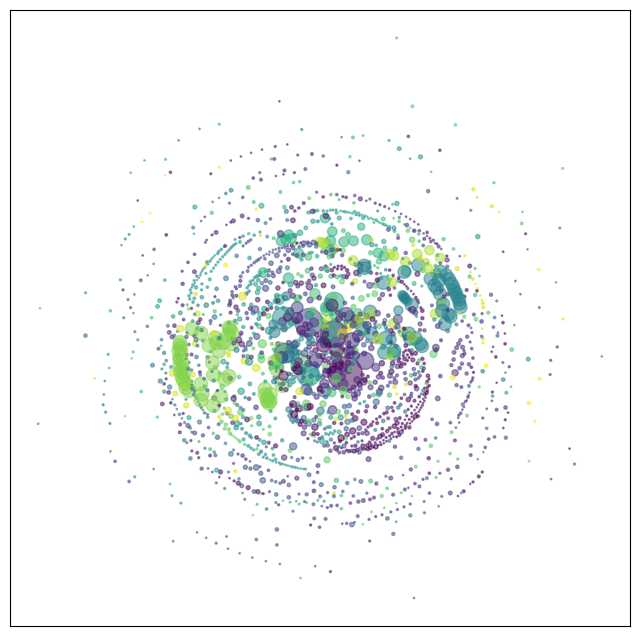

In [94]:
fig = plt.figure(figsize=(8,8))

node_options = {
    'node_size': in_degrees+out_degrees,
    'node_color': list(partition.values()),
    'alpha':0.5,
}

pos = pos = nx.kamada_kawai_layout(G_weakly_con.to_undirected())
nx.draw_networkx_nodes(G_weakly_con.to_undirected(), pos=pos, **node_options)

In [95]:
from fa2 import ForceAtlas2

In [97]:
# Set the parameters to tune for the ForceAtlas2 algorithm
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=30.0,
                        strongGravityMode=False,
                        gravity=220.0,

                        # Log
                        verbose=True
                        )

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:03<00:00, 16.26it/s]


BarnesHut Approximation  took  18.49  seconds
Repulsion forces  took  99.69  seconds
Gravitational forces  took  0.54  seconds
Attraction forces  took  0.38  seconds
AdjustSpeedAndApplyForces step  took  1.80  seconds


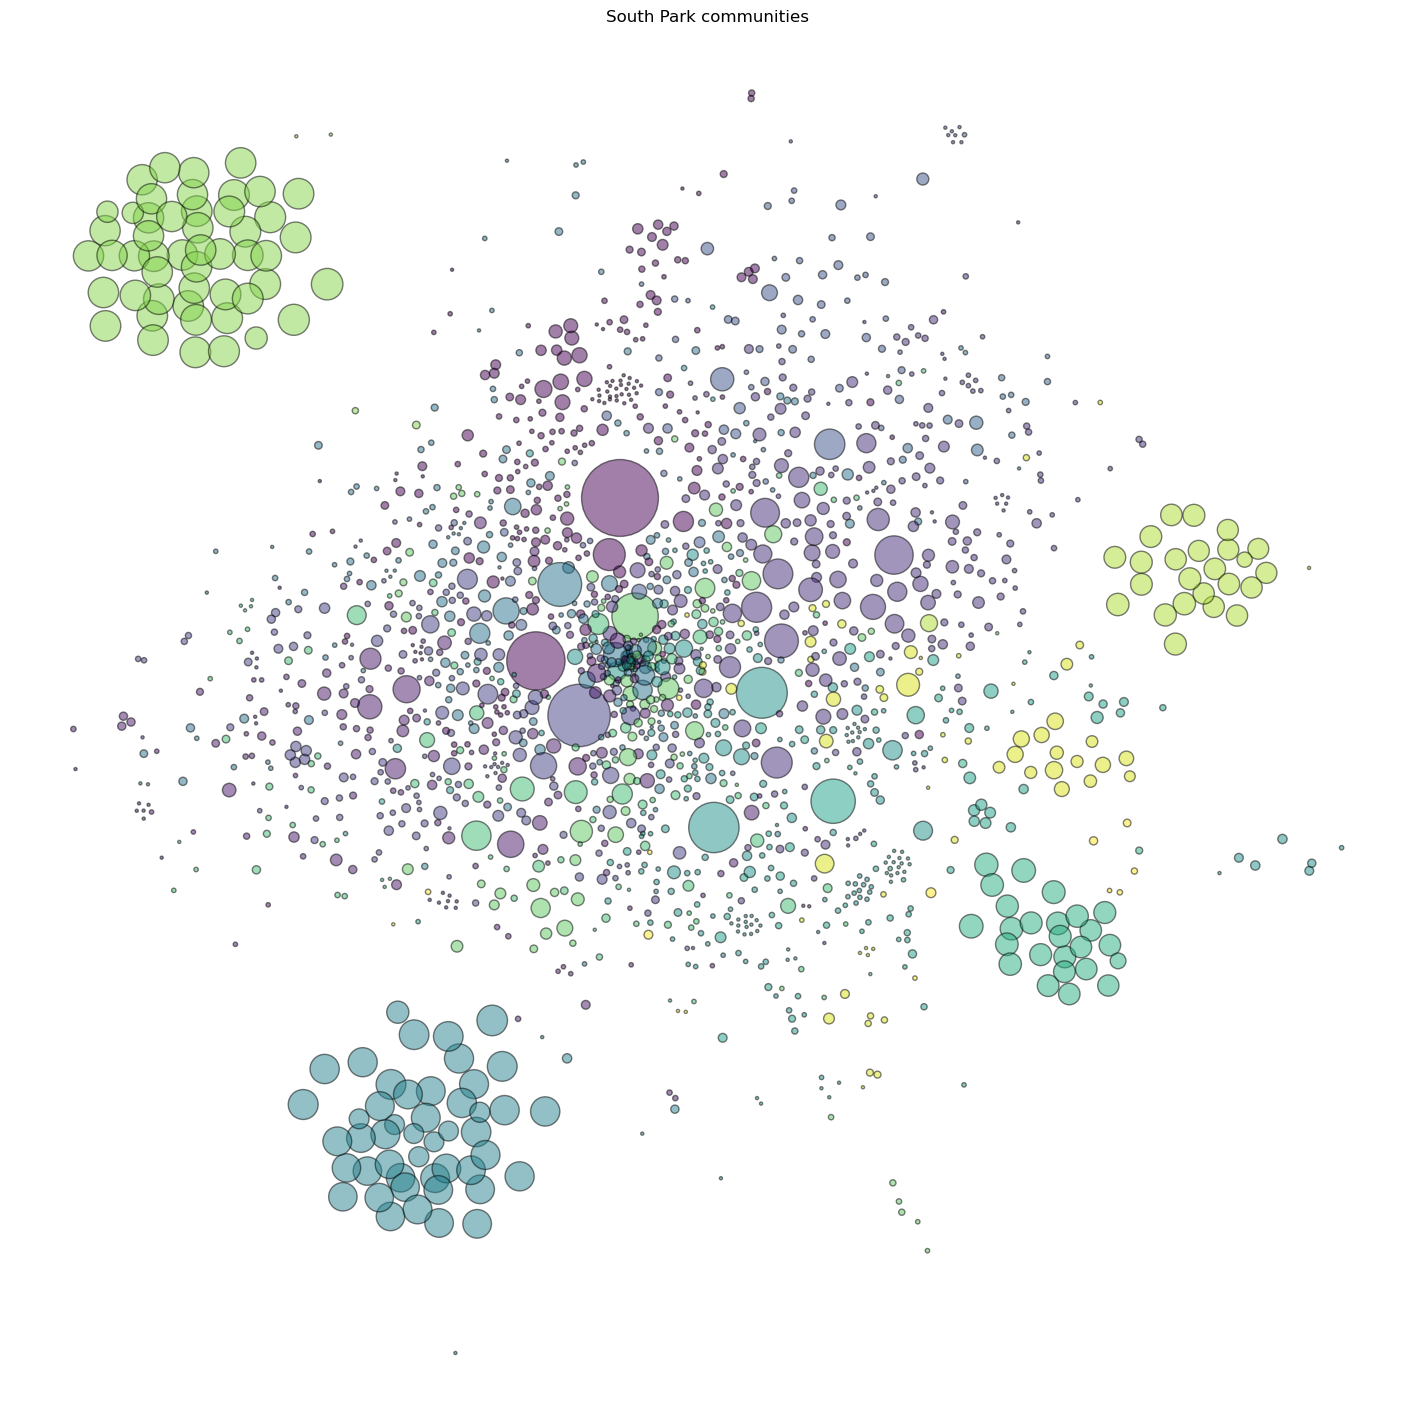

In [99]:

node_options = {
    'node_size': (in_degrees+out_degrees)*5,
    'node_color': list(partition.values()),
    'alpha':0.5,
}


iterations = 2000
fig = plt.figure(figsize=(18,18))
pos = forceatlas2.forceatlas2_networkx_layout(G_weakly_con.to_undirected(), pos=None, iterations=iterations)
nodes = nx.draw_networkx_nodes(G_weakly_con.to_undirected(), pos=pos, **node_options)
nodes.set_edgecolor('k')
# nx.draw_networkx_edges(G_weak, pos=pos,  edge_color=color_map_edges)


plt.title('South Park communities')
plt.axis('off')

plt.show()